# **RE ARTIKEL BERITA BAHASA INDONESIA**

## **KELOMPOK 1**

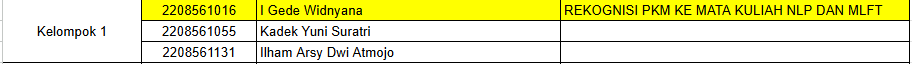


## **Sumber data**

- NER : https://github.com/IndoNLP/indonlu/blob/master/dataset/nerp_ner-prosa/train_preprocess.txt
- POS: https://github.com/IndoNLP/indonlu/blob/master/dataset/posp_pos-prosa/train_preprocess.txt

In [ ]:
import pandas as pd

# URL sumber data
url_pos = "https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/posp_pos-prosa/train_preprocess.txt"
url_ner = "https://raw.githubusercontent.com/IndoNLP/indonlu/master/dataset/nerp_ner-prosa/train_preprocess.txt"

# Fungsi untuk baca file ke list of sentences
def read_conll_format(url):
    import requests
    response = requests.get(url)
    lines = response.text.strip().split("\n")

    sentences = []
    sentence = []
    for line in lines:
        if line.strip() == "":
            if sentence:
                sentences.append(sentence)
                sentence = []
        else:
            parts = line.strip().split()
            sentence.append(parts)
    if sentence:
        sentences.append(sentence)
    return sentences

# Baca data NER dan POS
ner_sentences = read_conll_format(url_ner)
pos_sentences = read_conll_format(url_pos)

# Pastikan jumlah kalimat sama
assert len(ner_sentences) == len(pos_sentences), "Jumlah kalimat tidak sama!"

merged_data = []
for ner_sent, pos_sent in zip(ner_sentences, pos_sentences):
    # Pastikan panjang token sama per kalimat
    assert len(ner_sent) == len(pos_sent), "Token tidak cocok dalam satu kalimat!"
    for (ner_tok, pos_tok) in zip(ner_sent, pos_sent):
        token = ner_tok[0]
        pos_tag = pos_tok[1]
        ner_tag = ner_tok[1]
        merged_data.append([token, pos_tag, ner_tag])
    merged_data.append(["", "", ""])  # pemisah antar kalimat

# Konversi ke DataFrame
df = pd.DataFrame(merged_data, columns=["Token", "POS", "NER"])

# Simpan ke Excel
output_path = "merged_pos_ner.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Dataset gabungan berhasil dibuat dan disimpan sebagai: {output_path}")
print(df.head(15))


✅ Dataset gabungan berhasil dibuat dan disimpan sebagai: merged_pos_ner.xlsx
         Token    POS    NER
0       kepala  B-NNO      O
1        dinas  B-VBP      O
2         tata  B-NNO      O
3         kota  B-NNO      O
4       manado  B-NNP  B-PLC
5         amos  B-NNP  B-PPL
6        kenda  B-NNP  I-PPL
7   menyatakan  B-VBT      O
8        tidak  B-NEG      O
9         tahu  B-VBI      O
10           -  B-SYM      O
11      menahu  B-VBT      O
12        soal  B-NNO      O
13  pencabutan  B-NNO      O
14      baliho  B-NNO      O


In [ ]:
# Menampilkan beberapa baris pertama data
print("📊 Beberapa baris pertama DataFrame:")
display(df.head())

# Informasi umum tentang DataFrame
print("\nℹ️ Informasi DataFrame:")
df.info()

# Ringkasan statistik untuk kolom numerik (jika ada)
print("\n📈 Ringkasan statistik DataFrame:")
display(df.describe(include='all'))

# Menghitung jumlah nilai unik di setiap kolom
print("\n🔍 Jumlah nilai unik di setiap kolom:")
display(df.nunique())


📊 Beberapa baris pertama DataFrame:


,Token,POS,NER
0,kepala,B-NNO,O
1,dinas,B-VBP,O
2,tata,B-NNO,O
3,kota,B-NNO,O
4,manado,B-NNP,B-PLC



ℹ️ Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163129 entries, 0 to 163128
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Token   163129 non-null  object
 1   POS     163129 non-null  object
 2   NER     163129 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB

📈 Ringkasan statistik DataFrame:


,Token,POS,NER
count,163129,163129,163129
unique,18929,27,11
top,",",B-NNO,O
freq,8993,38063,140374



🔍 Jumlah nilai unik di setiap kolom:


,0
Token,18929
POS,27
NER,11


In [ ]:
#convert ke txt

# Pastikan tidak ada NaN
df = df.fillna("")

# Siapkan list untuk menampung baris output
lines = []

for _, row in df.iterrows():
    token = str(row["Token"]).strip()
    pos = str(row["POS"]).strip()
    ner = str(row["NER"]).strip()

    if token == "":  # kalau kosong, artinya akhir kalimat
        lines.append("")  # tambahkan baris kosong untuk pemisah antar kalimat
    else:
        lines.append(f"{token} {pos} {ner}")

# Gabungkan jadi teks utuh
output_text = "\n".join(lines)

# Simpan ke file TXT
output_path = "merged_pos_ner.txt"
with open(output_path, "w", encoding="utf-8") as f:
    f.write(output_text)

print(f"✅ File berhasil dikonversi ke format CoNLL dan disimpan sebagai: {output_path}")

✅ File berhasil dikonversi ke format CoNLL dan disimpan sebagai: merged_pos_ner.txt


In [ ]:
# Hilangkan baris kosong
df = df.dropna(subset=["Token", "POS", "NER"], how="all")

# Hanya pertahankan tag POS dan NER yang valid (awalan B- atau I- atau O)
def clean_tag(tag):
    if isinstance(tag, str) and (tag.startswith("B-") or tag.startswith("I-") or tag == "O"):
        return tag
    return "O"  # kalau aneh, ubah jadi 'O'

df["POS"] = df["POS"].apply(clean_tag)
df["NER"] = df["NER"].apply(clean_tag)

# Cek ulang label unik bersih
unique_pos = sorted(df["POS"].unique())
unique_ner = sorted(df["NER"].unique())

print("🧩 Unique POS tags (bersih):")
print(unique_pos)
print("\n🏷️ Unique NER tags (bersih):")
print(unique_ner)

# Simpan versi bersih
df.to_excel("merged_pos_ner_clean.xlsx", index=False)
print("\n✅ Dataset bersih disimpan ke merged_pos_ner_clean.xlsx")

🧩 Unique POS tags (bersih):
['B-$$$', 'B-ADJ', 'B-ADK', 'B-ADV', 'B-ART', 'B-CCN', 'B-CSN', 'B-INT', 'B-KUA', 'B-NEG', 'B-NNO', 'B-NNP', 'B-NUM', 'B-PAR', 'B-PPO', 'B-PRI', 'B-PRK', 'B-PRN', 'B-PRR', 'B-SYM', 'B-UNS', 'B-VBE', 'B-VBI', 'B-VBL', 'B-VBP', 'B-VBT', 'O']

🏷️ Unique NER tags (bersih):
['B-EVT', 'B-FNB', 'B-IND', 'B-PLC', 'B-PPL', 'I-EVT', 'I-FNB', 'I-IND', 'I-PLC', 'I-PPL', 'O']

✅ Dataset bersih disimpan ke merged_pos_ner_clean.xlsx


| Tag       | Arti                                     | Contoh                         |
| --------- | ---------------------------------------- | ------------------------------ |
| **B-ADJ** | Adjektiva (kata sifat)                   | *cantik, besar, cepat*         |
| **B-ADK** | Adverbia (kata keterangan)               | *sangat, agak, cukup*          |
| **B-ADV** | Adverbial phrase (frasa keterangan)      | *di sana, dengan cepat*        |
| **B-ART** | Artikel                                  | *si, sang, para*               |
| **B-CCN** | Conjunction (kata sambung)               | *dan, atau, tetapi*            |
| **B-CSN** | Subordinating conjunction                | *karena, agar, jika*           |
| **B-INT** | Interjeksi                               | *wah, aduh, hei*               |
| **B-KUA** | Kuantor (penentu jumlah)                 | *beberapa, banyak, seluruh*    |
| **B-NEG** | Negasi                                   | *tidak, bukan*                 |
| **B-NNO** | Noun (kata benda umum)                   | *buku, rumah, meja*            |
| **B-NNP** | Proper noun (nama diri)                  | *Jakarta, Indonesia, Asep*     |
| **B-NUM** | Numeralia (bilangan)                     | *satu, dua, ketiga*            |
| **B-PAR** | Partikel                                 | *lah, kah, pun*                |
| **B-PPO** | Preposisi (kata depan)                   | *di, ke, dari, dengan*         |
| **B-PRI** | Pronomina Indefinit                      | *sesuatu, seseorang*           |
| **B-PRK** | Pronomina Konektif                       | *yang, mana*                   |
| **B-PRN** | Pronomina (kata ganti)                   | *saya, kamu, mereka*           |
| **B-PRR** | Pronomina Refleksif                      | *dirinya, sendiri*             |
| **B-UNS** | Unsur asing (kata serapan/tidak dikenal) | *email, software*              |
| **B-VBE** | Verba “to be”                            | *adalah, ialah*                |
| **B-VBI** | Verba intransitif                        | *tidur, datang, pergi*         |
| **B-VBL** | Verba linking                            | *menjadi, tampak*              |
| **B-VBP** | Verba pasif                              | *dikerjakan, dibaca*           |
| **B-VBT** | Verba transitif                          | *makan, baca, tulis*           |
| **B-$$$** | Simbol Mata Uang                 | *Rp, Usd*                     |
| **B-SYM** | Simbol                                   | *%, $ @*                      |
| **O**     | Tidak diberi tag (Other)                 | Biasanya tanda baca atau noise |


| Tag       | Arti                                                                     |
| --------- | ------------------------------------------------------------------------ |
| **B-EVT** | Beginning name of the event                                  |
| **I-EVT** | Inside name of the event                                  |
| **B-FNB** | Beginning name of food and beverage |
| **I-FNB** | Inside name of food and beverage |
| **B-IND** | Beginning name of product or brand                                            |
| **I-IND** | Inside name of product or brand                                                  |
| **B-PLC** | Beginning of Place (lokasi)                                              |
| **I-PLC** | Inside Place                                                             |
| **B-PPL** | Beginning of Person (nama orang)                                         |
| **I-PPL** | Inside Person                                                            |
| **O**     | Outside (bukan entitas apa pun)                                          |


In [ ]:
# Menghitung distribusi frekuensi untuk kolom 'POS' dan 'NER'
print("\n📊 Distribusi frekuensi POS tags:")
display(df['POS'].value_counts())

print("\n📊 Distribusi frekuensi NER tags:")
display(df['NER'].value_counts())


📊 Distribusi frekuensi POS tags:


,count
POS,
B-NNO,38063
B-NNP,28427
B-SYM,23421
B-PPO,12469
B-VBT,7628
O,7388
B-NUM,6634
B-ADJ,4892
B-VBI,4508



📊 Distribusi frekuensi NER tags:


,count
NER,
O,140374
B-PPL,4844
B-PLC,4365
B-IND,3065
I-PPL,2818
I-IND,2202
I-PLC,2003
I-EVT,1619
B-EVT,1022


# Use Case Diagram
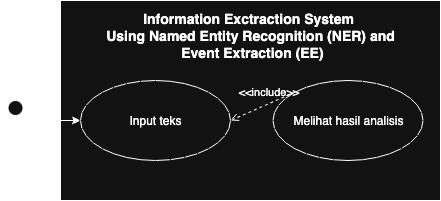

# Activity Diagram
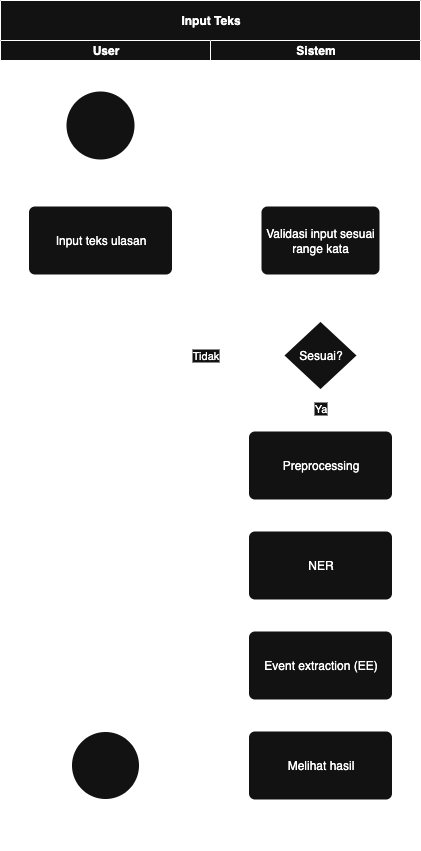

#Desain Interface

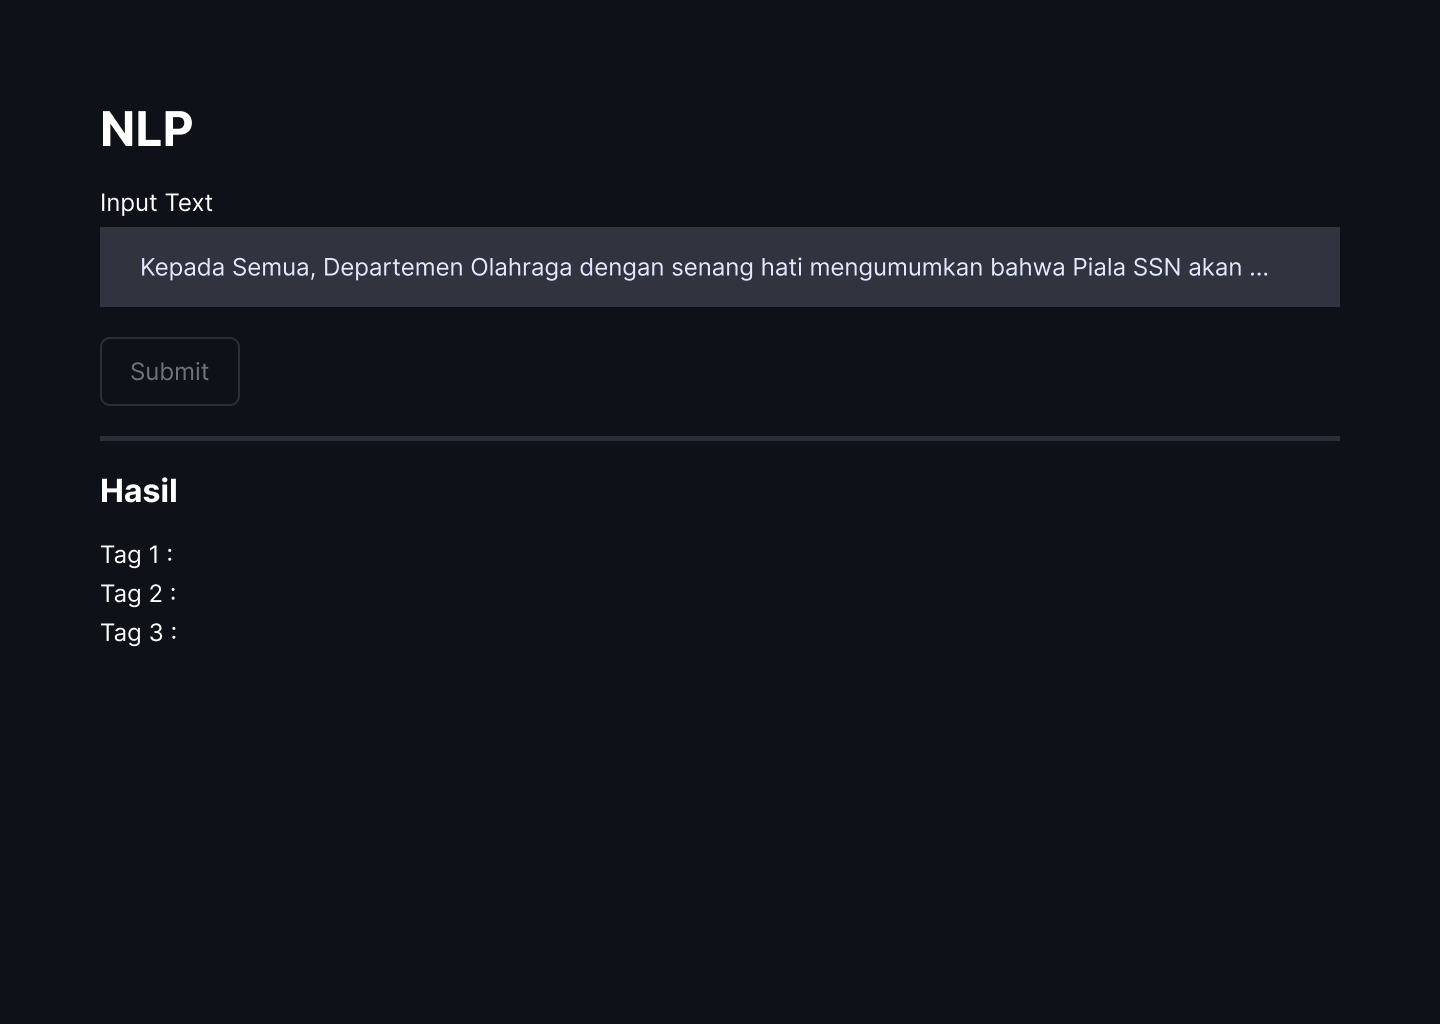